<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/assg_2_code_AI0051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train = np.load("/content/drive/My Drive/training_data.npy")

label = np.load("/content/drive/My Drive/training_label.npy")

test = np.load("/content/drive/My Drive/testing_data.npy")

Using TensorFlow backend.


In [0]:
num_classes = 10

label_cat = to_categorical(label, num_classes)

X_train, X_test, y_train, y_test = train_test_split(train, label_cat, test_size=0.2, random_state=42)

In [0]:
model = Sequential()
#add model layers

#we are adding 2 Convlution layers, max pooling, dropouts(regularize)
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.output_shape)

md = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))

W0721 16:28:29.549361 140423699588992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 16:28:29.568893 140423699588992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 16:28:29.571925 140423699588992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 16:28:29.587109 140423699588992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 16:28:29.589598 140423699588992 deprecation_wrapp

(None, 10)
Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 7s 136us/step - loss: 0.6908 - acc: 0.7437 - val_loss: 0.4754 - val_acc: 0.8253
Epoch 2/40
48000/48000 [==============================] - 4s 78us/step - loss: 0.4581 - acc: 0.8322 - val_loss: 0.3995 - val_acc: 0.8558
Epoch 3/40
48000/48000 [==============================] - 4s 78us/step - loss: 0.3937 - acc: 0.8561 - val_loss: 0.3457 - val_acc: 0.8726
Epoch 4/40
48000/48000 [==============================] - 4s 79us/step - loss: 0.3596 - acc: 0.8679 - val_loss: 0.3148 - val_acc: 0.8842
Epoch 5/40
48000/48000 [==============================] - 4s 80us/step - loss: 0.3326 - acc: 0.8792 - val_loss: 0.3143 - val_acc: 0.8822
Epoch 6/40
48000/48000 [==============================] - 4s 79us/step - loss: 0.3162 - acc: 0.8840 - val_loss: 0.2909 - val_acc: 0.8934
Epoch 7/40
48000/48000 [==============================] - 4s 78us/step - loss: 0.3027 - acc: 0.8879 - val_loss: 0.28

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


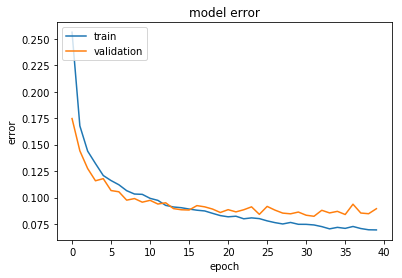

In [0]:
print(md.history.keys())

#Calculating error from accuracy
error = [1 - x for x in md.history['acc']]
val_error = [1 - x for x in md.history['val_acc']]

# summarize error for graph
plt.plot(error)
plt.plot(val_error)
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:
model.save("assg_2_model_AI0051.h5")

op = model.predict(test)
np.save("labels_1_2_AI0051.npy", op)